In [1]:
from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *
from LIMxCMBL.kernels import get_f_Kkappa, get_f_KI, get_f_KILo, apply_window

In [2]:
limber_cross_vectorized

<function LIMxCMBL.cross_spectrum.limber_cross_vectorized(f_Kpsi, f_Kphi)>

In [3]:
zmin = 2.0
zmax = 2.5
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

In [4]:
f_Kkappa = get_f_Kkappa()
Lambda = 0.1 # 1 / cMpc

In [5]:
a_of_chibs = ccl.scale_factor_of_chi(cosmo, chibs)
z_of_chibs = 1/a_of_chibs - 1

In [6]:
c1 = plt.cm.rainbow(np.linspace(0, 1, len(ells)))[::-1]
c2 = plt.cm.rainbow(np.linspace(0, 1, len(chibs)))

# I kappa

In [7]:
f_KLIM   = get_f_KI()
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [8]:
Ik = d_delta_integral(f_KLIM_windowed, f_Kkappa)

In [9]:
Ik_limber = np.zeros_like(Ik)

for ell_idx in range(len(ells)):
    ell = ells[ell_idx]
    Ik_limber[ell_idx] = f_KLIM_windowed(chibs) * f_Kkappa(chibs) / chibs**2 * ccl.linear_matter_power(cosmo, (ell + 1/2) / chibs, 1)

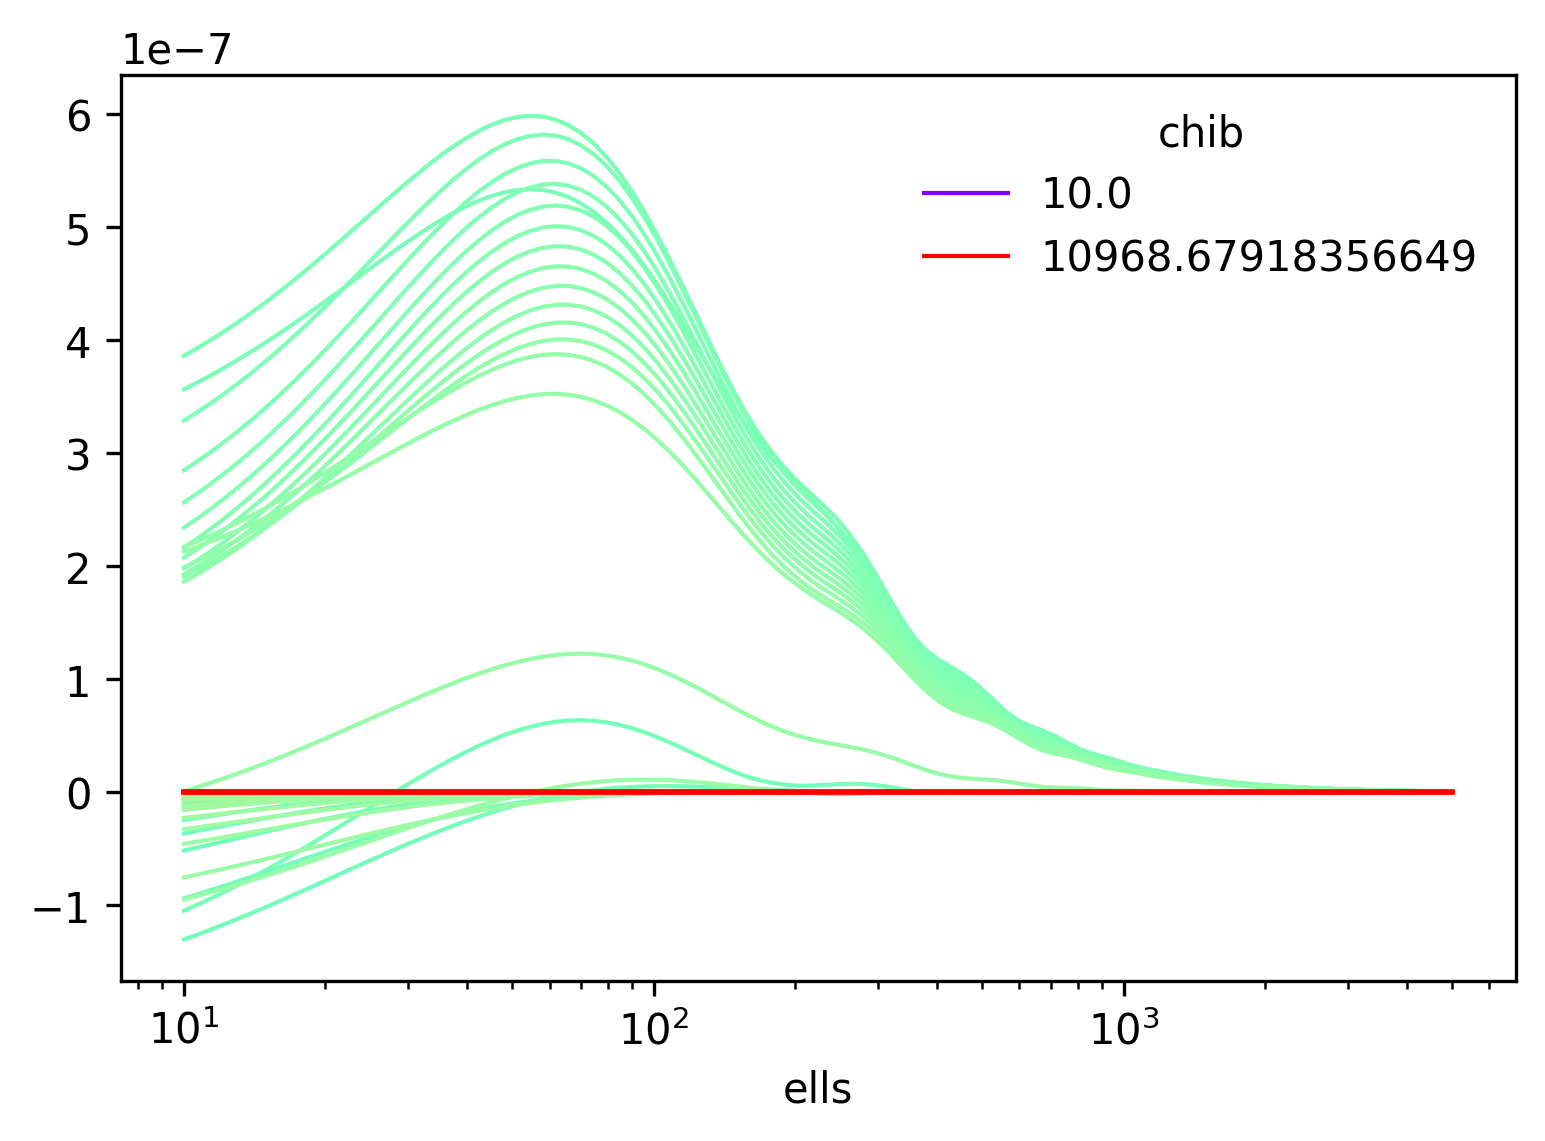

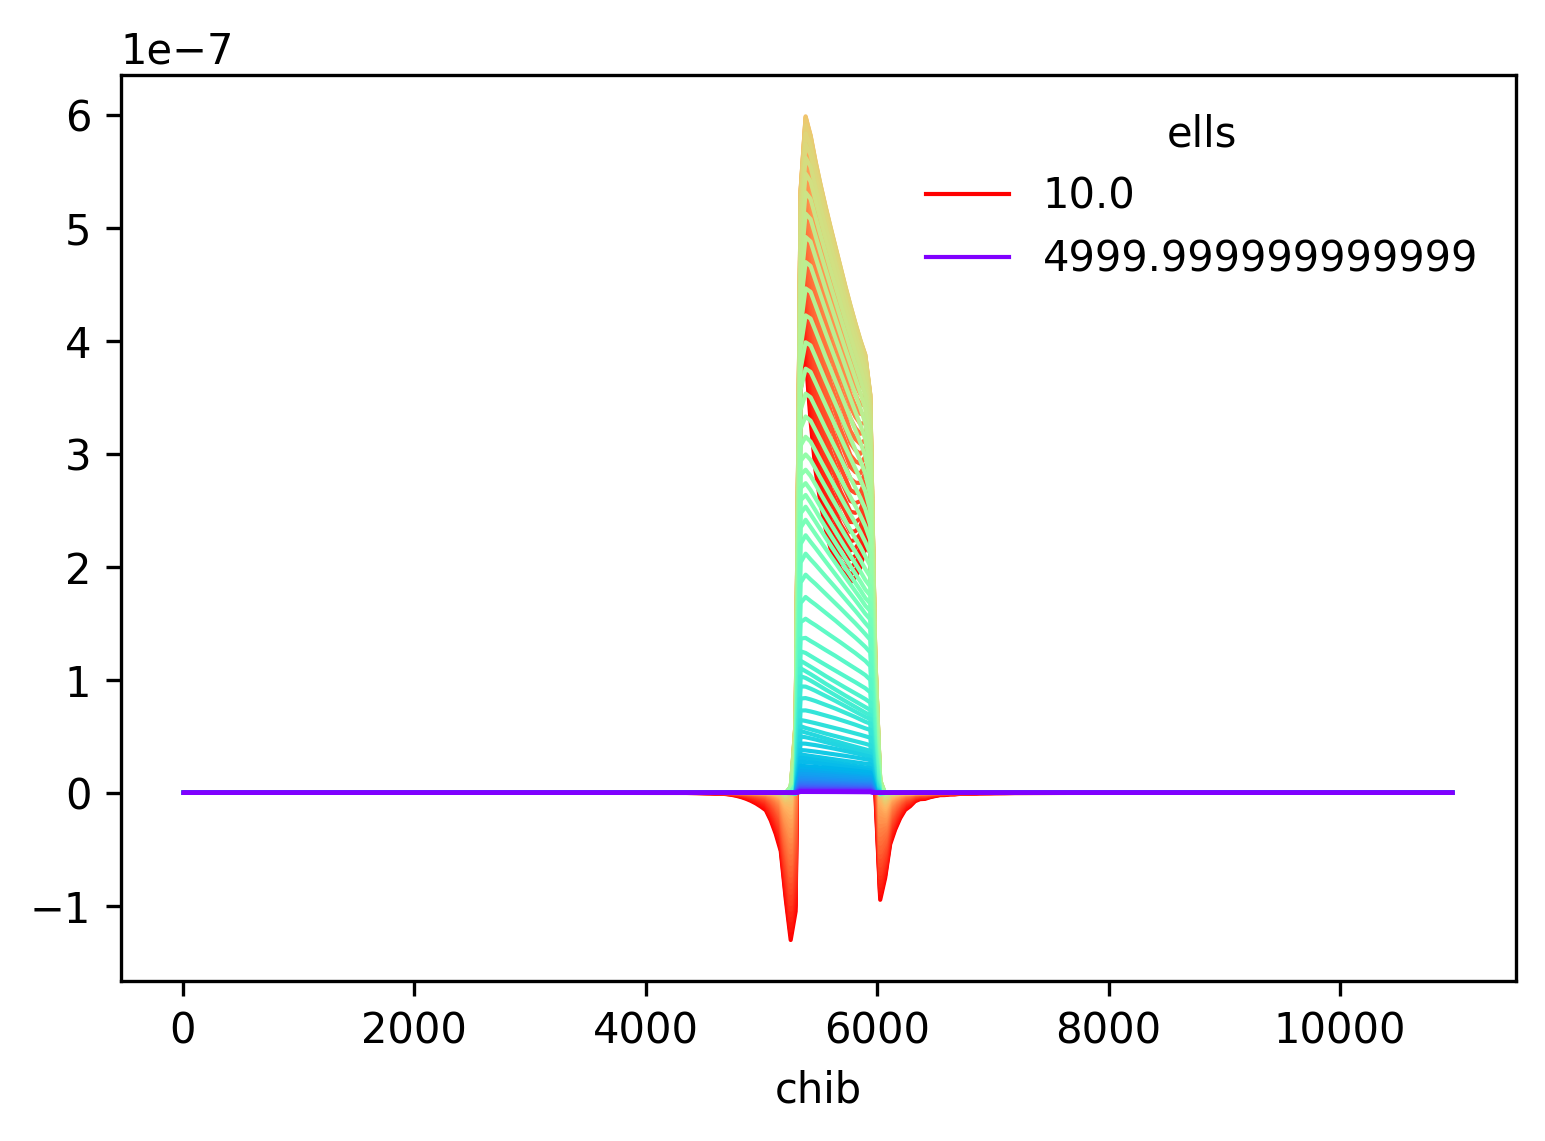

In [10]:
plt.figure(dpi = 300)
for chib_idx, c in enumerate(c2):
    plt.plot(ells, 
             Ik[:,chib_idx],
             lw = 1,
             label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
             c=c)
plt.xlabel('ells')
plt.xscale('log')
plt.legend(frameon=False, title='chib')
plt.show()

plt.figure(dpi = 300)

for ell_idx, c in enumerate(c1):
    plt.plot(chibs, 
             Ik[ell_idx], 
             lw = 1,
             label=ells[ell_idx] if (ell_idx ==0 or ell_idx == len(c1)-1) else None, 
             c=c)
plt.xlabel('chib')
plt.legend(frameon=False, title='ells')
plt.show()


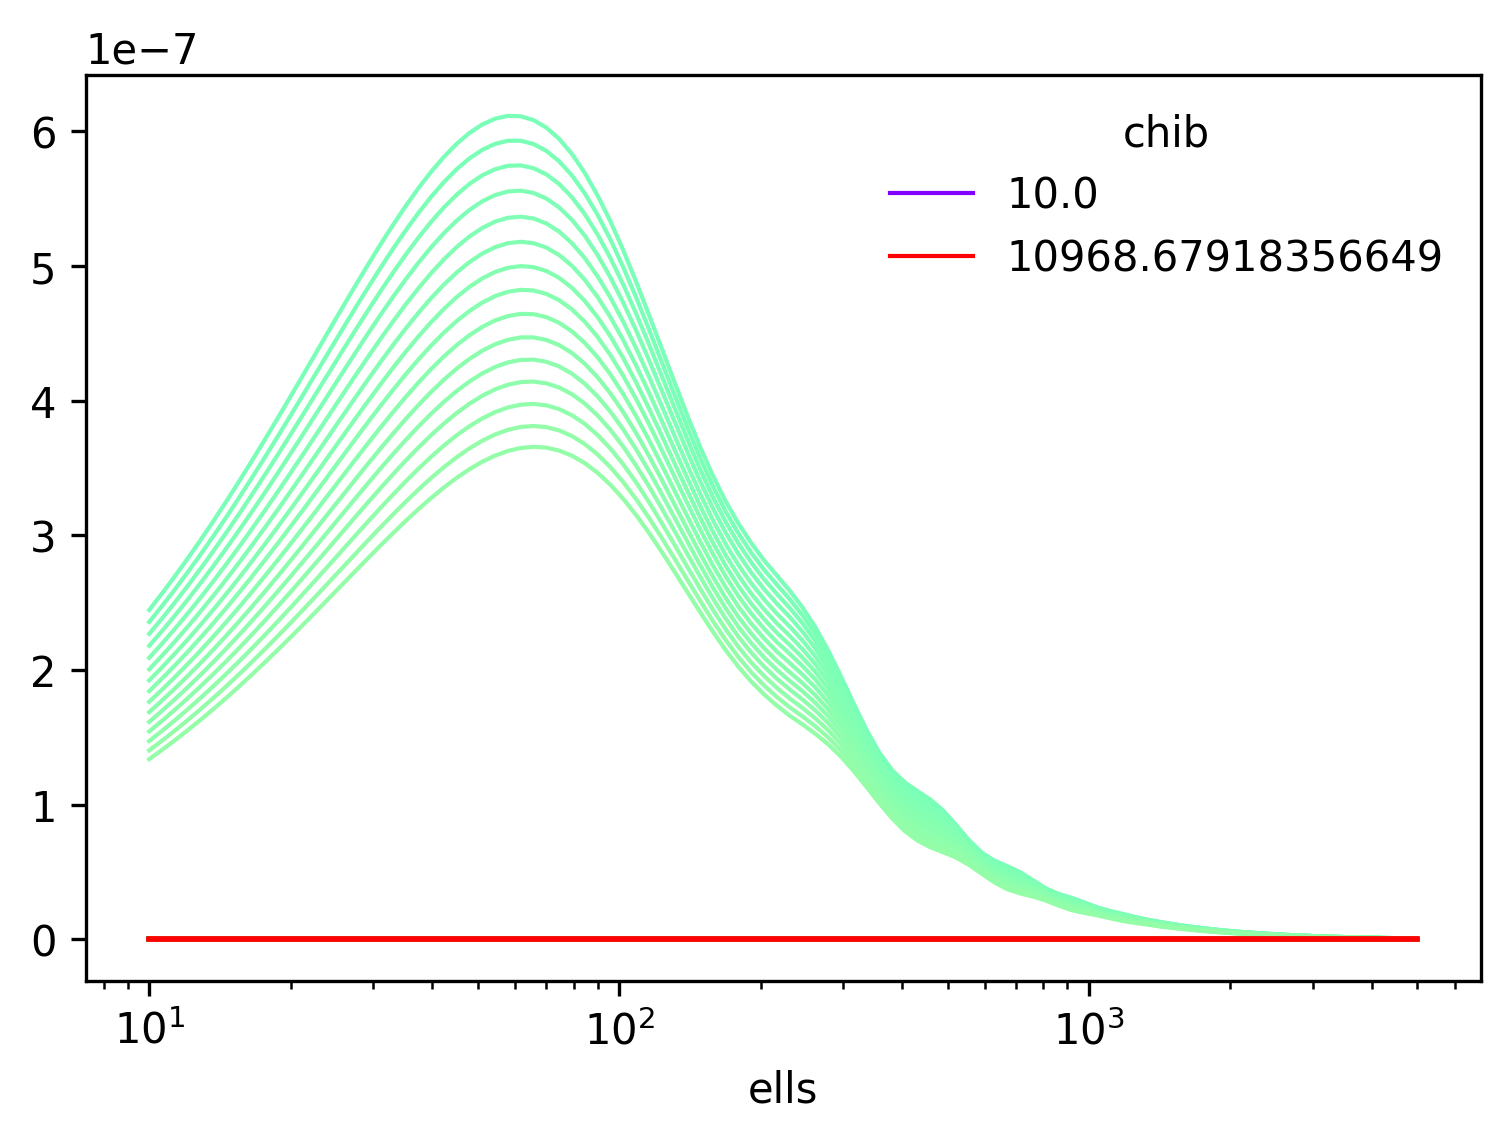

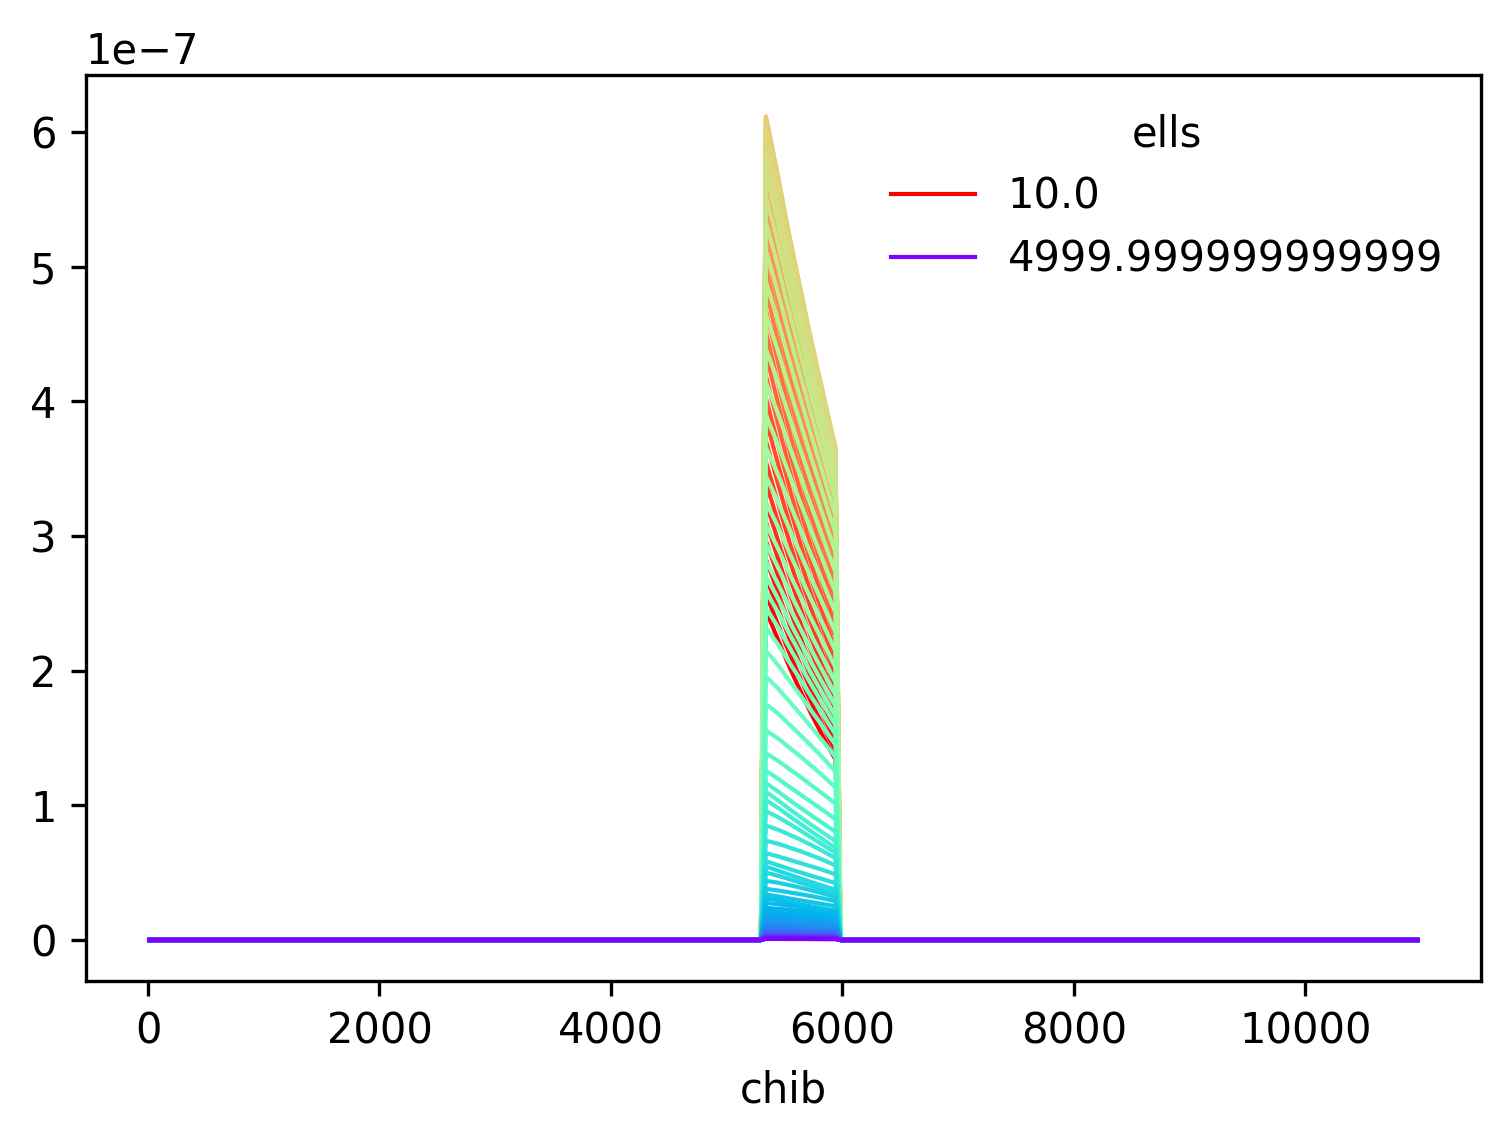

In [11]:
plt.figure(dpi = 300)
for chib_idx, c in enumerate(c2):
    plt.plot(ells, 
             Ik_limber[:,chib_idx],
             lw = 1,
             label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
             c=c)
plt.xlabel('ells')
plt.xscale('log')
plt.legend(frameon=False, title='chib')
plt.show()

plt.figure(dpi = 300)

for ell_idx, c in enumerate(c1):
    plt.plot(chibs, 
             Ik_limber[ell_idx], 
             lw = 1,
             label=ells[ell_idx] if (ell_idx ==0 or ell_idx == len(c1)-1) else None, 
             c=c)
plt.xlabel('chib')
plt.legend(frameon=False, title='ells')
plt.show()


# ILo k

In [12]:
ILok_limber = np.zeros((len(ells), len(chibs)), dtype=np.float128)

from tqdm import trange

for chi_idx in trange(len(chibs)):
    chi = chibs[chi_idx]
    f_KLIMLo   = get_f_KILo(external_chi = chi, Lambda=Lambda)
    f_KLIMLo_windowed = apply_window(f_K = f_KLIMLo,
                                     chimin = chimin,
                                     chimax = chimax)
    ILok_limber[:, chi_idx] = limber_cross_vectorized(f_KLIMLo_windowed, f_Kkappa)

100%|██████████| 256/256 [00:00<00:00, 584.33it/s]


In [13]:
ILok = np.zeros((len(ells), len(chibs)), dtype=np.float128)

from tqdm import trange

for chi_idx in trange(len(chibs)):
    chi = chibs[chi_idx]
    f_KLIMLo   = get_f_KILo(external_chi = chi, Lambda=Lambda)
    f_KLIMLo_windowed = apply_window(f_K = f_KLIMLo,
                                     chimin = chimin,
                                     chimax = chimax)
    ILok[:, chi_idx]           = d_chib_integral(f_KLIMLo_windowed, f_Kkappa)

100%|██████████| 256/256 [01:09<00:00,  3.68it/s]


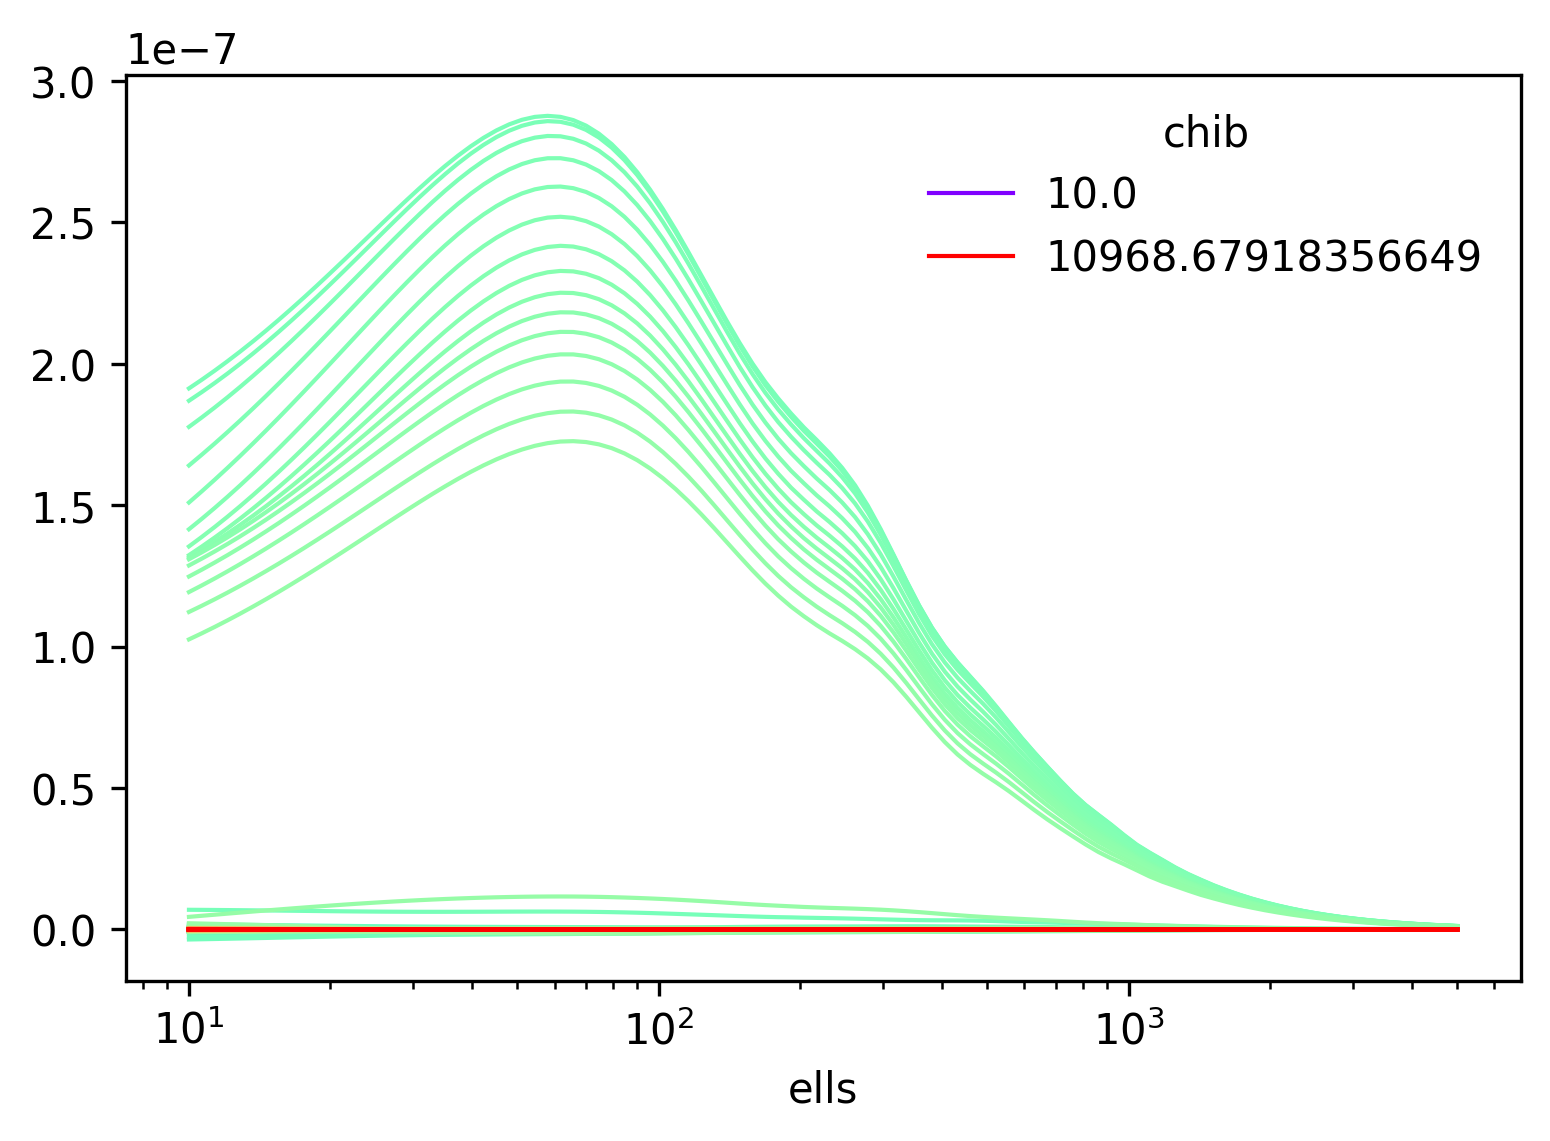

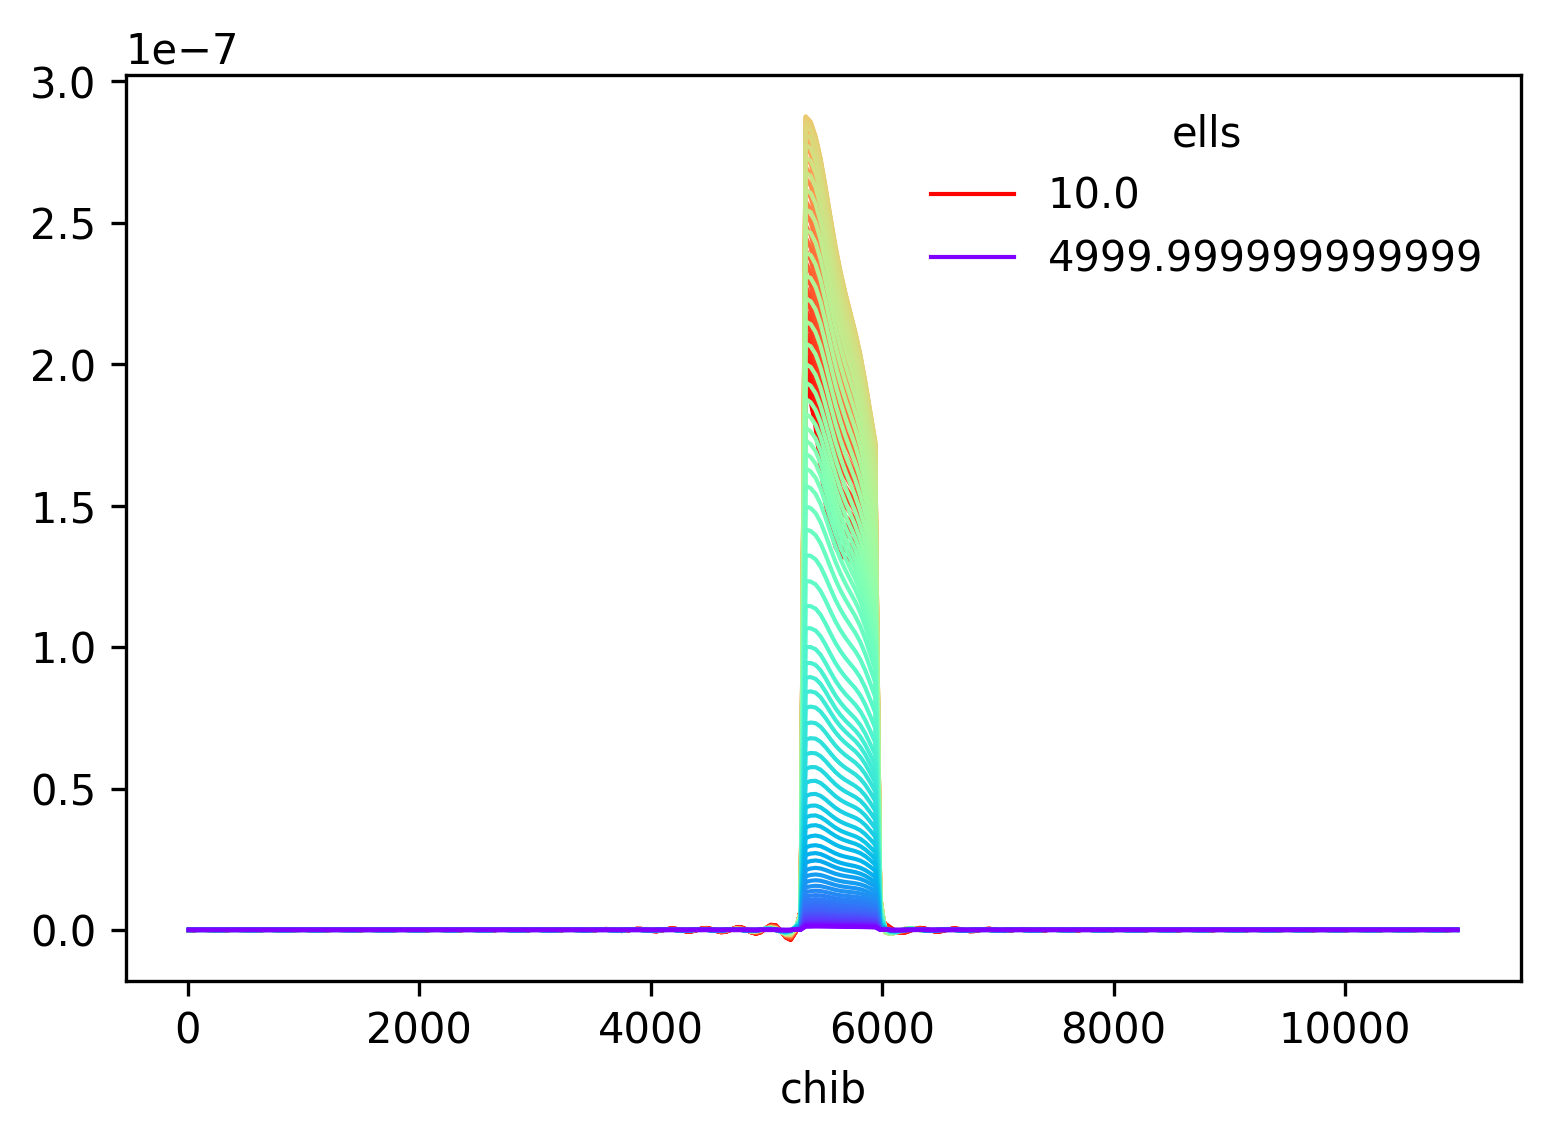

In [14]:
plt.figure(dpi = 300)
for chib_idx, c in enumerate(c2):
    plt.plot(ells, 
             ILok[:,chib_idx],
             lw = 1,
             label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
             c=c)
plt.xlabel('ells')
plt.xscale('log')
plt.legend(frameon=False, title='chib')
plt.show()

plt.figure(dpi = 300)

for ell_idx, c in enumerate(c1):
    plt.plot(chibs, 
             ILok[ell_idx], 
             lw = 1,
             label=ells[ell_idx] if (ell_idx ==0 or ell_idx == len(c1)-1) else None, 
             c=c)
plt.xlabel('chib')
plt.legend(frameon=False, title='ells')
plt.show()


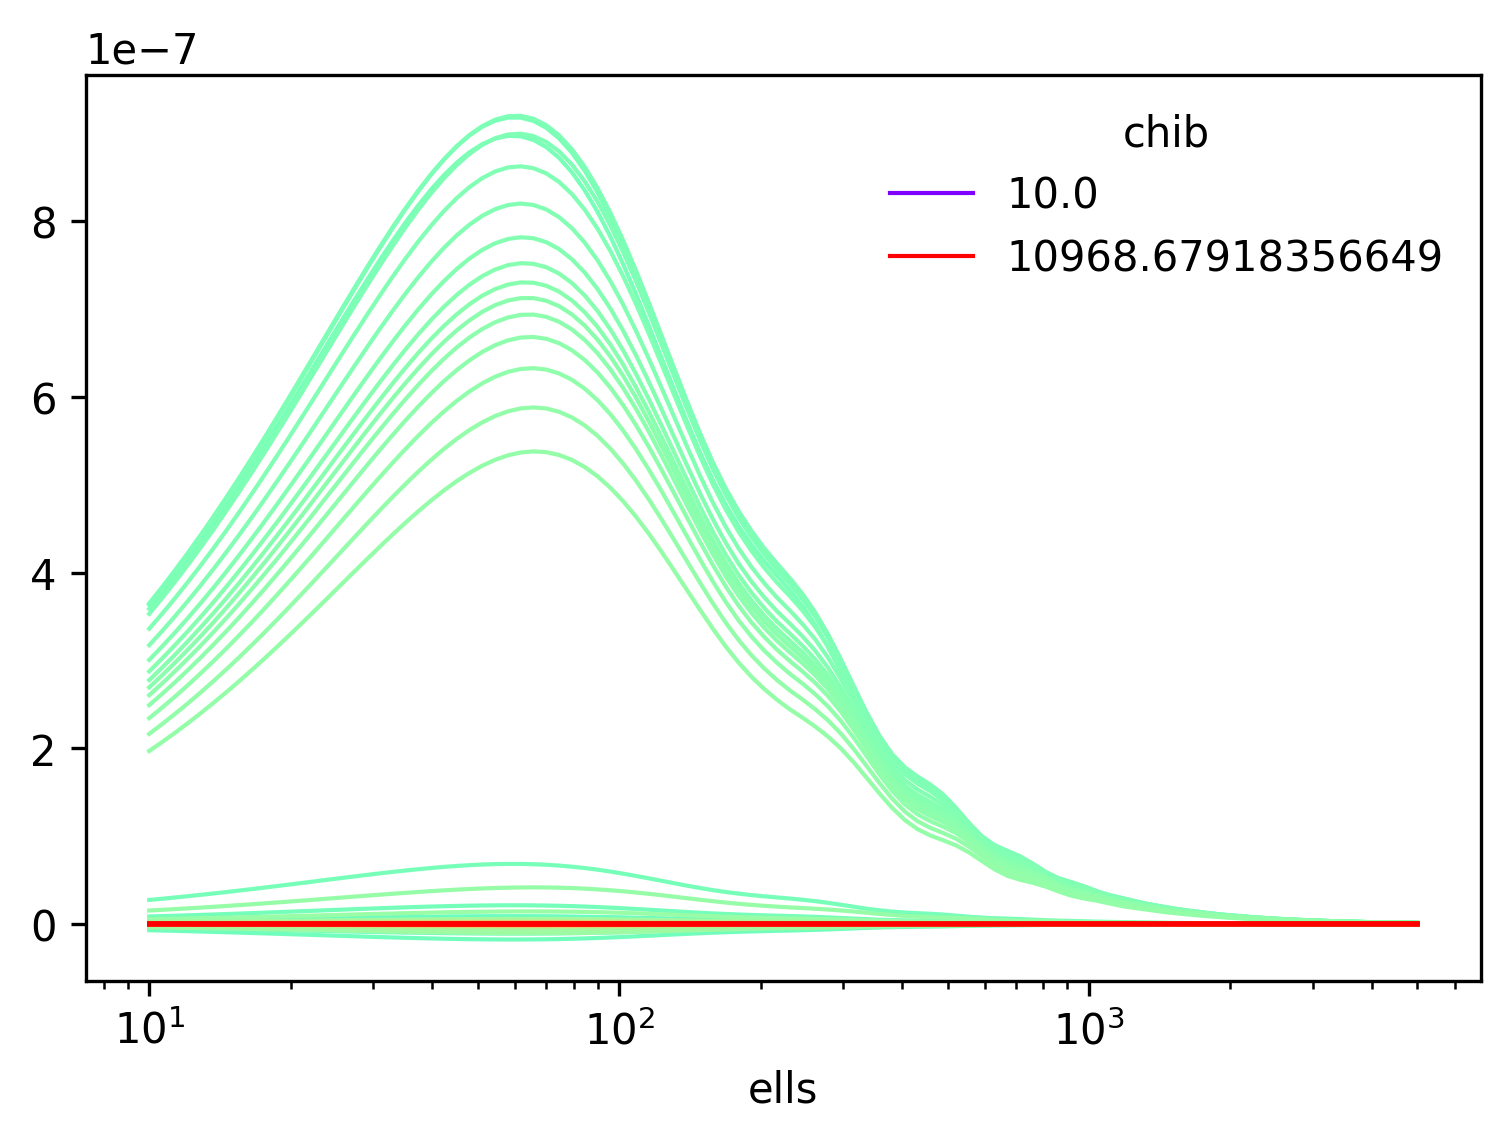

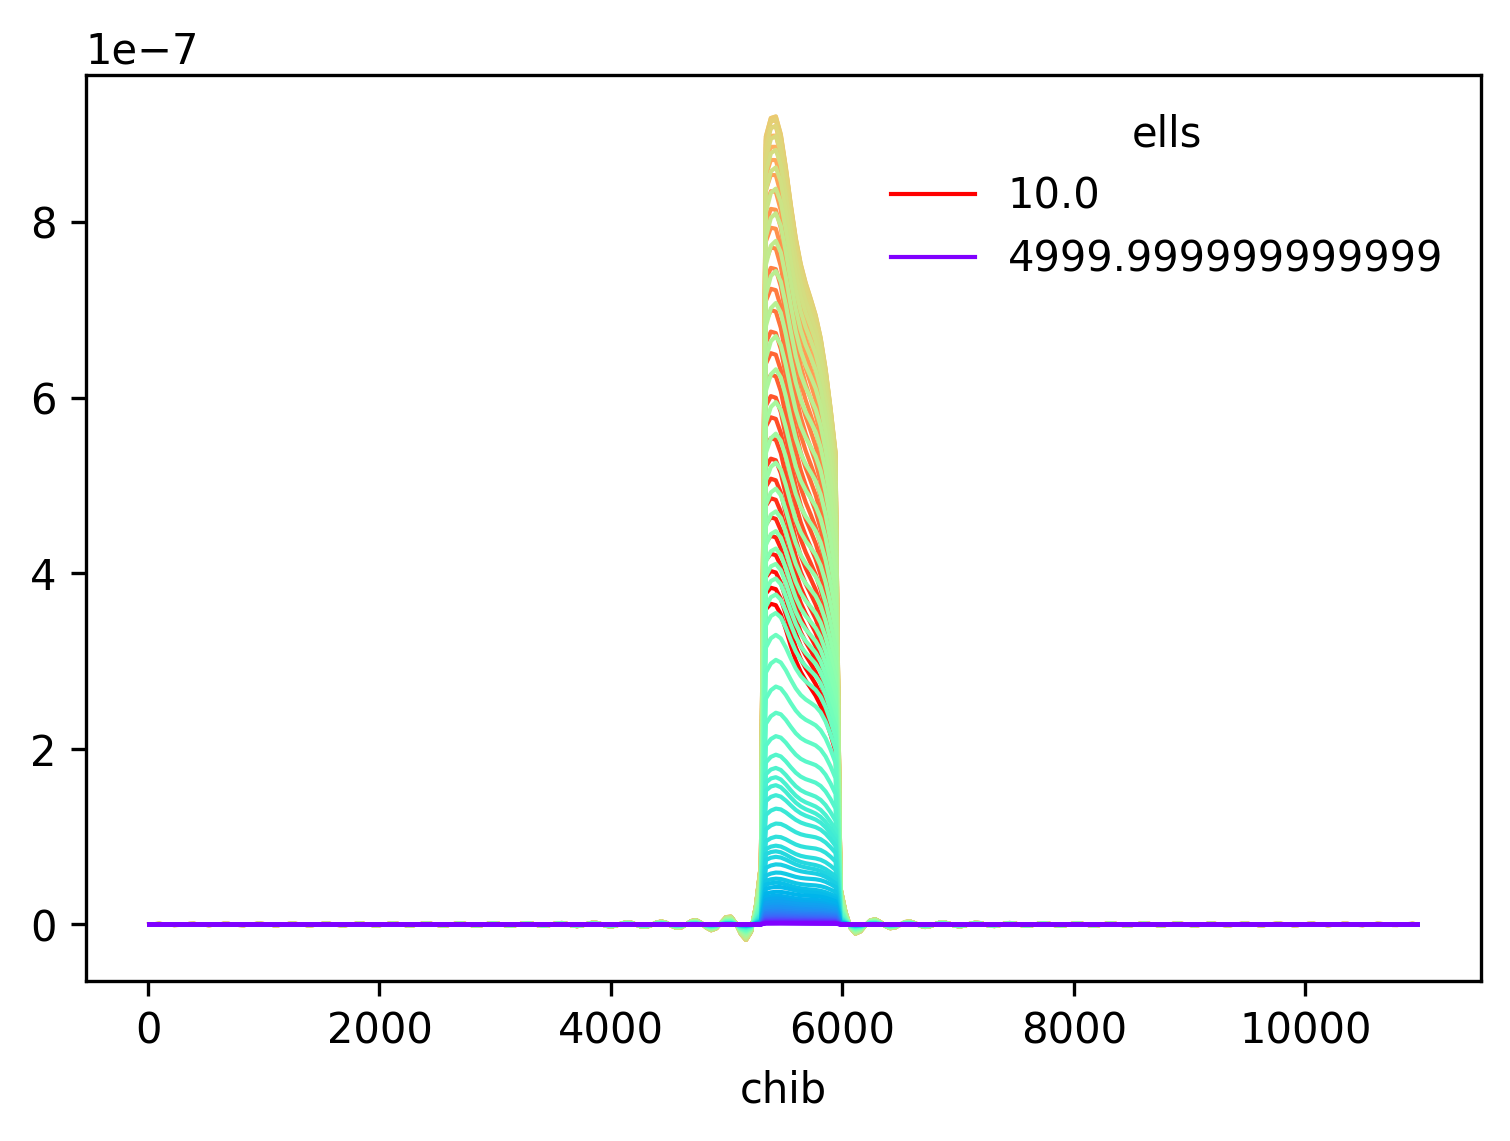

In [15]:
plt.figure(dpi = 300)
for chib_idx, c in enumerate(c2):
    plt.plot(ells, 
             ILok_limber[:,chib_idx],
             lw = 1,
             label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
             c=c)
plt.xlabel('ells')
plt.xscale('log')
plt.legend(frameon=False, title='chib')
plt.show()

plt.figure(dpi = 300)

for ell_idx, c in enumerate(c1):
    plt.plot(chibs, 
             ILok_limber[ell_idx], 
             lw = 1,
             label=ells[ell_idx] if (ell_idx ==0 or ell_idx == len(c1)-1) else None, 
             c=c)
plt.xlabel('chib')
plt.legend(frameon=False, title='ells')
plt.show()


# IHi K

In [16]:
IHi_kappa = Ik - ILok

In [17]:
from matplotlib import colors

/tmp/ipykernel_16512/3938589586.py:9: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cs.collections:


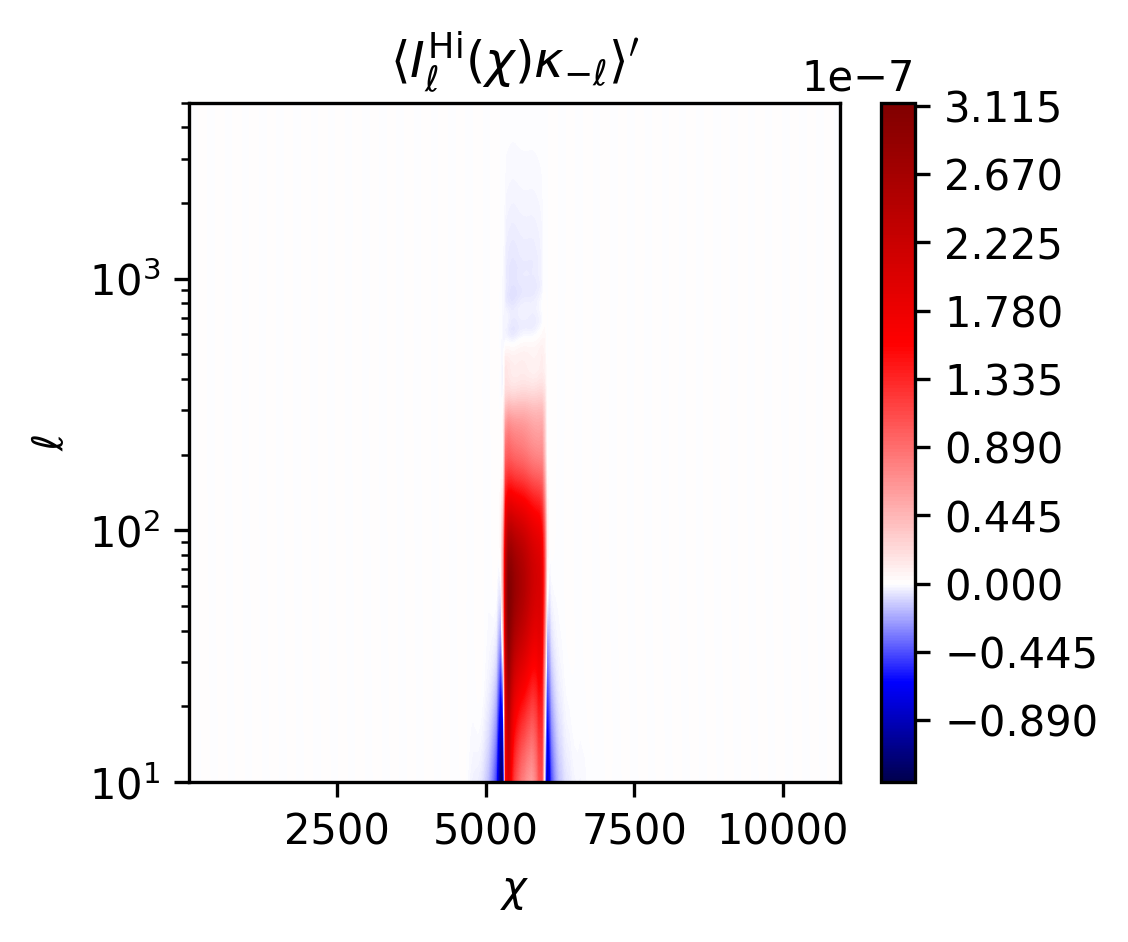

In [18]:
plt.figure(figsize=(3.5,3), dpi=300, facecolor='w',)
cs = plt.contourf(chibs, ells, IHi_kappa, levels=2**10,
                  cmap='seismic',
                  norm=colors.TwoSlopeNorm(vmin=IHi_kappa.min(), vcenter=0, vmax=IHi_kappa.max()))
plt.yscale('log')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\ell$')

for c in cs.collections:
    c.set_rasterized(True)


plt.title(r"$\langle I_{ \ell}^{\sf Hi}(\chi) \kappa_{- \ell}\rangle'$")

plt.colorbar()

In [19]:
IHi_kappa_limber = Ik_limber - ILok_limber

In [20]:
ILok_limber.min()

-1.7660584447810849142e-08

/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Casting input data from float128 to float64 for imshow.
  func(*args, **kwargs)
/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


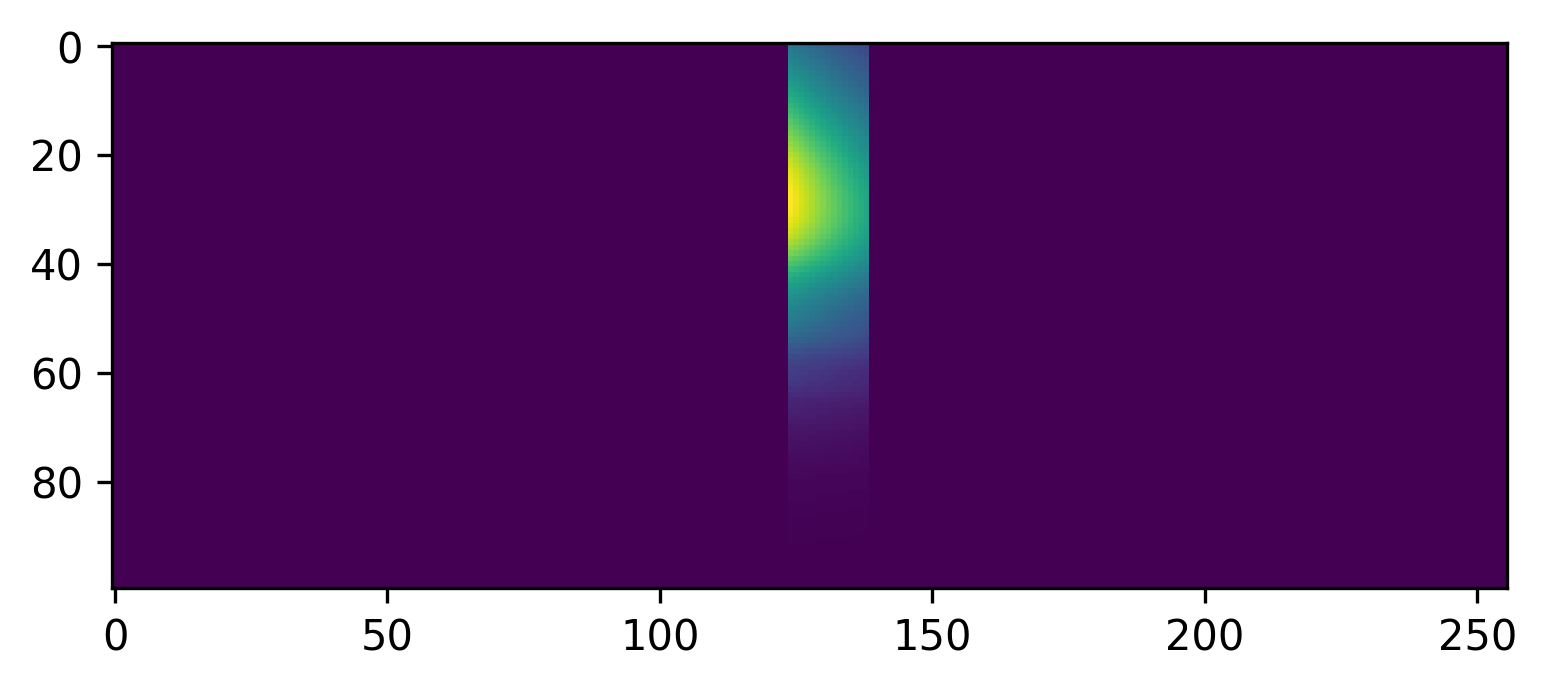

In [21]:
plt.figure(dpi = 300)
plt.imshow(np.abs(Ik_limber), vmin = np.abs(Ik_limber).min(), vmax = np.abs(Ik_limber).max())

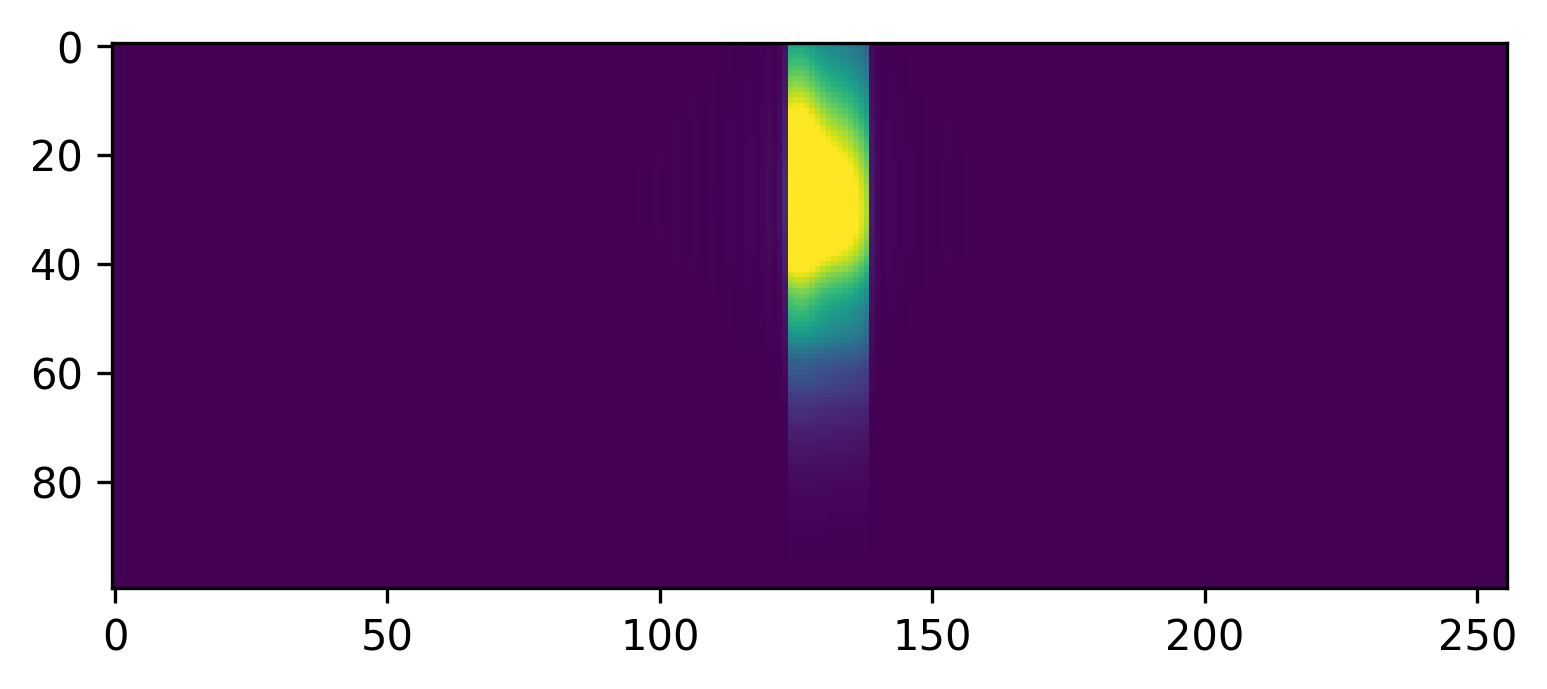

In [22]:
plt.figure(dpi = 300)
plt.imshow(np.abs(ILok_limber), vmin = np.abs(Ik_limber).min(), vmax = np.abs(Ik_limber).max())

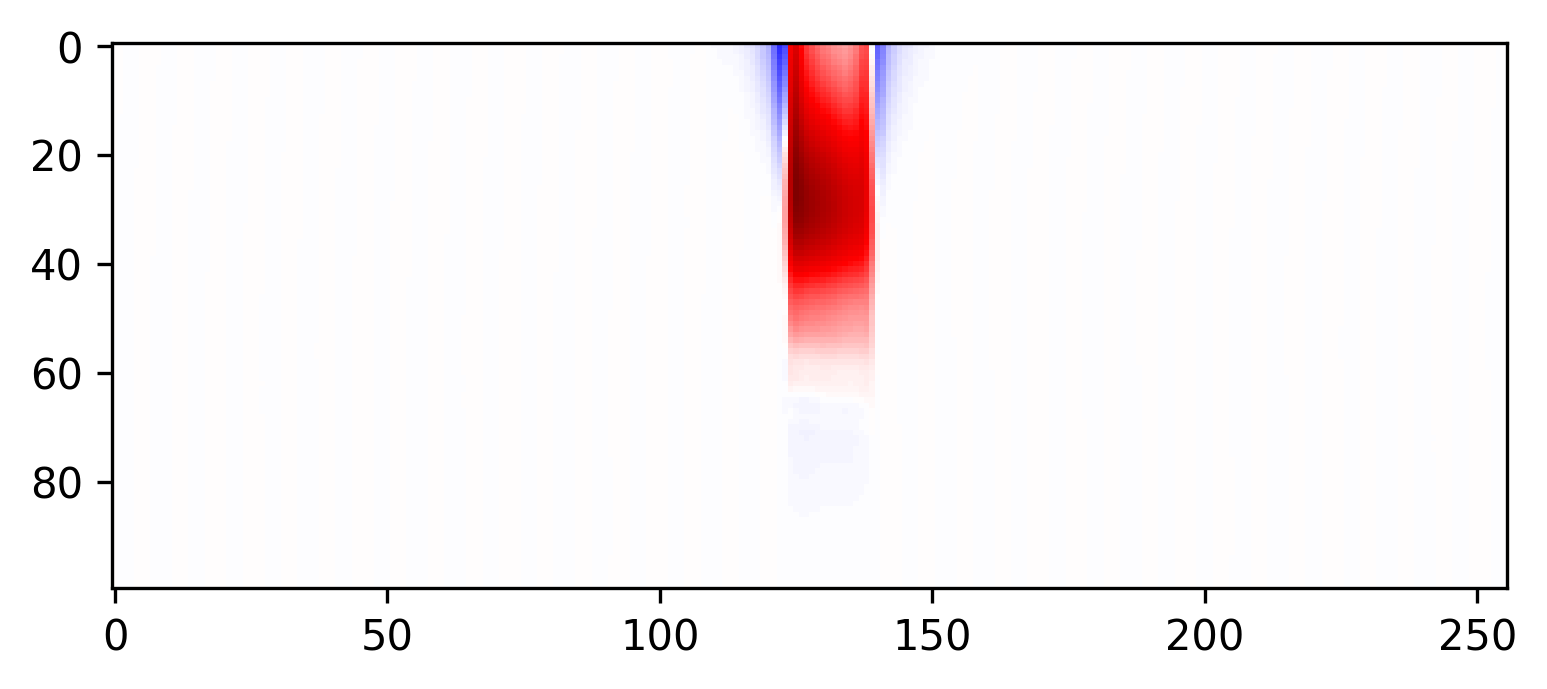

In [23]:
plt.figure(dpi = 300)
plt.imshow((IHi_kappa), vmin = -np.abs(IHi_kappa).max(), vmax = np.abs(IHi_kappa).max(),
          cmap = 'seismic')

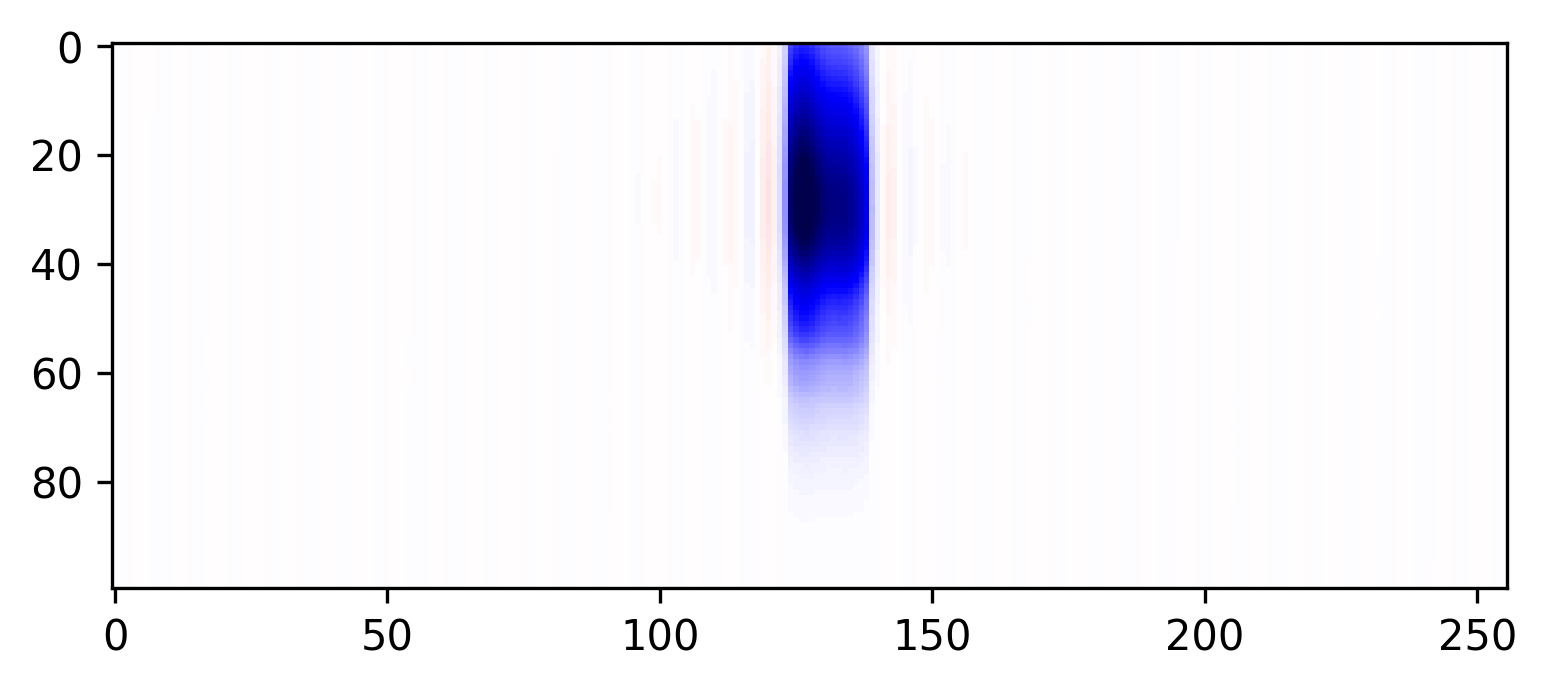

In [24]:
plt.figure(dpi = 300)
plt.imshow((IHi_kappa_limber), vmin = -np.abs(IHi_kappa).max(), vmax = np.abs(IHi_kappa).max(),
          cmap = 'seismic')